**Author**

Ilham Pandu Prasetyo

(ilhampandu68@gmail.com)

January 2023

# **Home Credit Score Card**

In [1]:
## Import library
import numpy as np
import pandas as pd
import sklearn
import pprint
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from pprint import pprint
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns',500)
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

*Data Training*

In [2]:
df_train = pd.read_csv("3_home-credit-default-risk/application_train.csv")
print('This dataset has %d rows and %d columns.' % df_train.shape)

This dataset has 307511 rows and 122 columns.


In [3]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Exploratory Data Analysis

*Data Types in Dataset*

In [4]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
non_numerical_colum = [col for col in df_train.columns if df_train[col].dtype == 'O']
print(f"Number Non-numerical columns are {len(non_numerical_colum)}")
pprint(non_numerical_colum)

Number Non-numerical columns are 16
['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']


In [6]:
numerical_column = [col for col in df_train.columns if df_train[col].dtype != 'O']
print(f"Number Numerical columns are {len(numerical_column)}")
pprint(numerical_column)

Number Numerical columns are 106
['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',

*Overview Columns*

In [7]:
view_train = df_train.copy()

### *Univariate*

In [8]:
sorted(view_train['TARGET'].unique())

[0, 1]

This case target containing 0 and 1 values. 0 treat it like has no problem with 'Payment difficulties' and 1 otherwise.

In [9]:
target_data = view_train['TARGET'].value_counts().to_frame()
target_data_norm = view_train['TARGET'].value_counts(normalize=True).to_frame()

In [10]:
## Number of each categorical in 'TARGET' column
target_data

,TARGET
0,282686
1,24825


In [11]:
## Percentage of each categorical in 'TARGET' column
target_data_norm

,TARGET
0,0.919271
1,0.080729


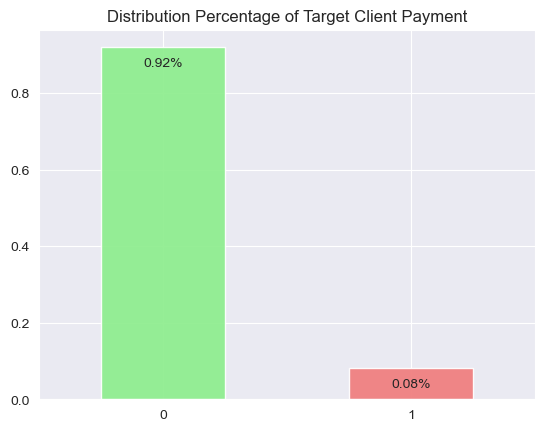

In [12]:
target_data_norm['TARGET'].plot(kind='bar', alpha=0.95, rot=0, color=['lightgreen', 'lightcoral'])
plt.title('Distribution Percentage of Target Client Payment', fontsize=12)

for idx, data in enumerate(target_data_norm.values):
    plt.text(idx, data-0.05, f'{data[0]:.2f}%', ha='center', fontsize=10)

plt.show()

- Around ~92% `TARGET = 0` that indicates client has no problem with doing payment again
- Around ~8% `TARGET = 1` that indicates client has problem with doing payment again

> And we can see this `TARGET` are imbalanced, so we must manage and tackle it

### *Bivariate*

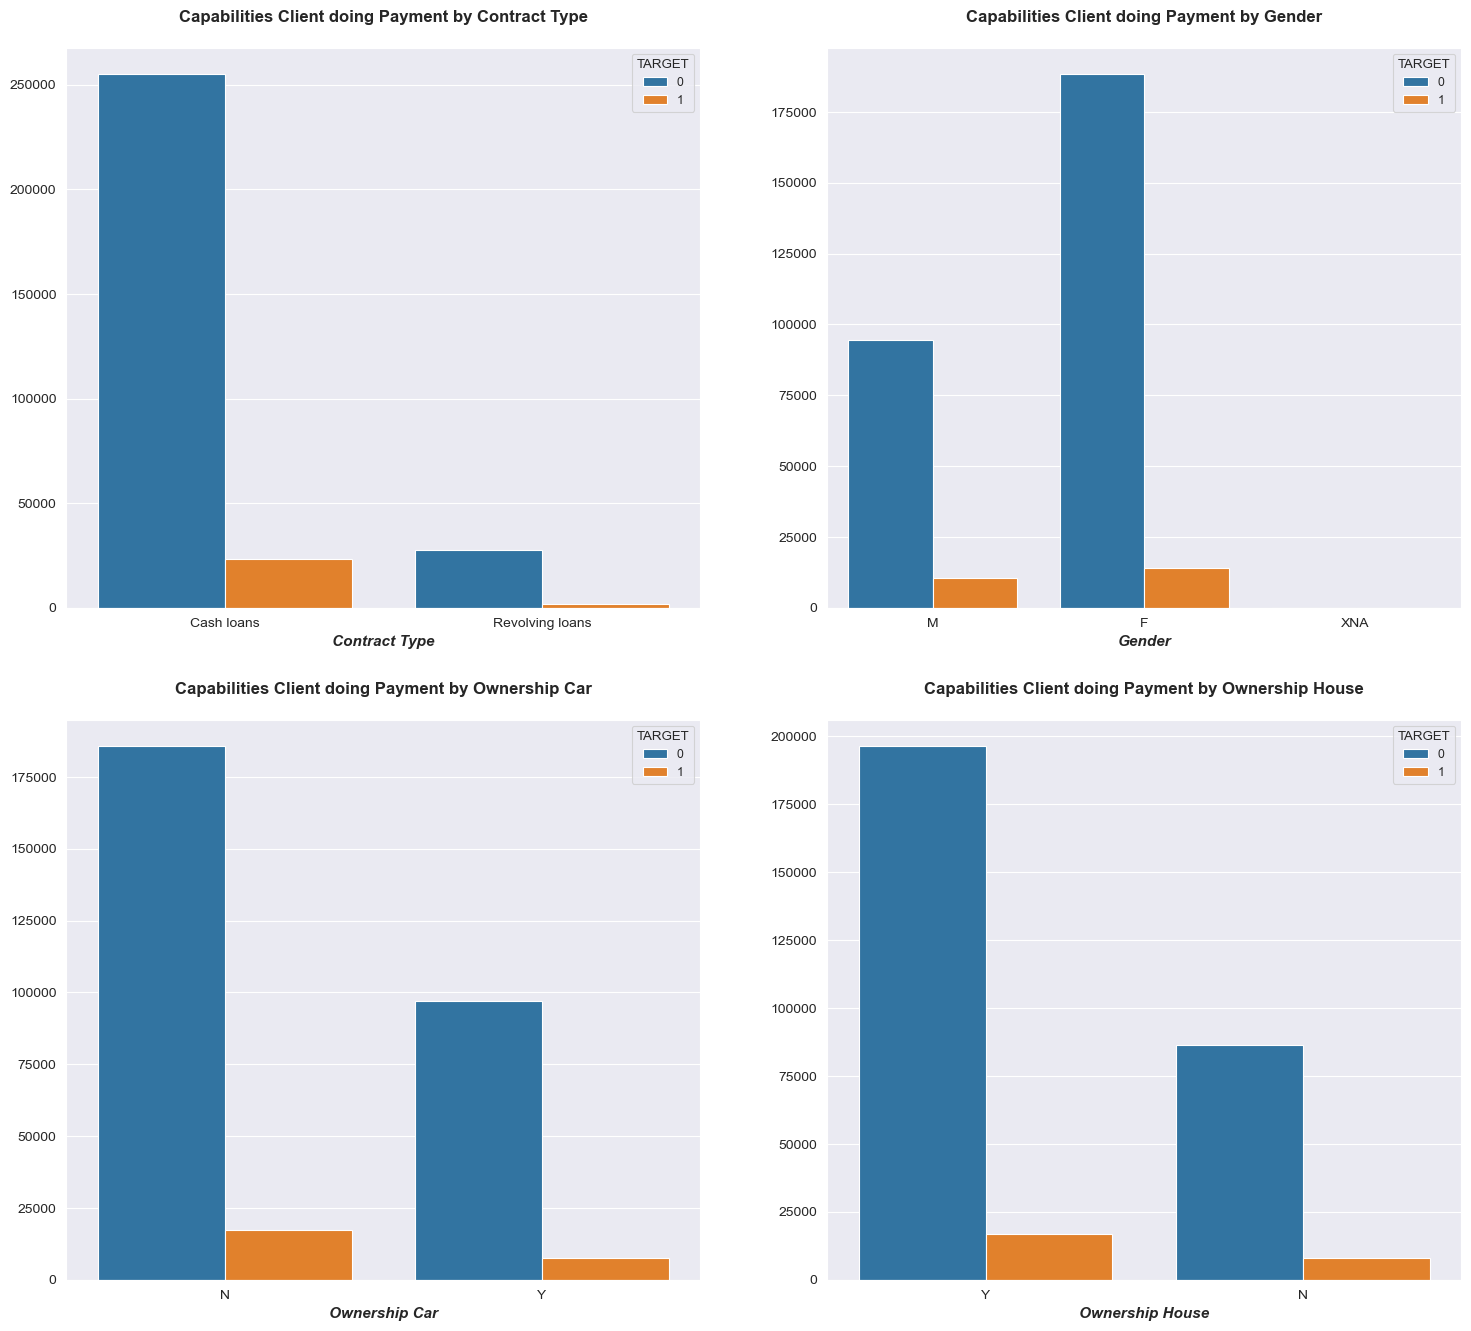

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,16))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Capabilities Client doing Payment by Contract Type\n',fontweight='bold',fontsize=12)
sns.countplot(x='NAME_CONTRACT_TYPE', data=view_train, hue='TARGET', ax=ax[0][0])
ax[0][0].set_xlabel('Contract Type', fontdict={'style':'italic', 'weight':'heavy', 'size':11}) 
ax[0][0].set(xlabel='Contract Type', ylabel=None)

ax[0][1].set_title('Capabilities Client doing Payment by Gender\n',fontweight='bold',fontsize=12)
sns.countplot(x='CODE_GENDER', data=view_train, hue='TARGET', ax=ax[0][1])
ax[0][1].set_xlabel('Gender', fontdict={'style':'italic', 'weight':'heavy', 'size':11}) 
ax[0][1].set(xlabel='Gender', ylabel=None)

ax[1][0].set_title('Capabilities Client doing Payment by Ownership Car\n',fontweight='bold',fontsize=12)
sns.countplot(x='FLAG_OWN_CAR', data=view_train, hue='TARGET', ax=ax[1][0])
ax[1][0].set_xlabel('Ownership Car', fontdict={'style':'italic', 'weight':'heavy', 'size':11}) 
ax[1][0].set(xlabel='Ownership Car', ylabel=None)

ax[1][1].set_title('Capabilities Client doing Payment by Ownership House\n',fontweight='bold',fontsize=12)
sns.countplot(x='FLAG_OWN_REALTY', data=view_train, hue='TARGET', ax=ax[1][1])
ax[1][1].set_xlabel('Ownership House', fontdict={'style':'italic', 'weight':'heavy', 'size':11}) 
ax[1][1].set(xlabel='Ownership House', ylabel=None)


plt.show()


###### \- Contract Type -

In [14]:
ct_col = view_train[['NAME_CONTRACT_TYPE', 'TARGET']].groupby(by=['NAME_CONTRACT_TYPE']).count()
ct_col['TARGET_to_CONTRACT TYPE_%'] = np.round((ct_col['TARGET'] / ct_col['TARGET'].sum()) * 100, 2)
ct_col.sort_values(by='TARGET_to_CONTRACT TYPE_%', ascending=False)

,TARGET,TARGET_to_CONTRACT TYPE_%
NAME_CONTRACT_TYPE,,
Cash loans,278232,90.48
Revolving loans,29279,9.52


- Around ~278K (~90%), **Cash loans** have majority total loans in dataset *(higher)*
- Around ~ 29K (~9%), **Revolving loans** have minority total loans in dataset *(lower)*

###### \- Gender -

In [15]:
g_col = view_train[['CODE_GENDER', 'TARGET']].groupby(by=['CODE_GENDER']).count()
g_col['TARGET_to_GENDER_%'] = np.round((g_col['TARGET'] / g_col['TARGET'].sum()) * 100, 4)
g_col.sort_values(by='TARGET_to_GENDER_%', ascending=False)

,TARGET,TARGET_to_GENDER_%
CODE_GENDER,,
F,202448,65.8344
M,105059,34.1643
XNA,4,0.0013


- Most Client Gender has loans is `Female` around ~202K (~65%)

###### \- Ownership Car -

In [16]:
foc_col = view_train[['FLAG_OWN_CAR', 'TARGET']].groupby(by=['FLAG_OWN_CAR']).count()
foc_col['TARGET_to_OWN CAR_%'] = np.round((foc_col['TARGET'] / foc_col['TARGET'].sum()) * 100, 2)
foc_col.sort_values(by='TARGET_to_OWN CAR_%', ascending=False)

,TARGET,TARGET_to_OWN CAR_%
FLAG_OWN_CAR,,
N,202924,65.99
Y,104587,34.01


- Around ~202K (~65%), Clients are **don't have** `Car` when they have loans
- Around ~104K (~34%), Clients are **have** `Car` when they have loans

###### \- Residence -

In [17]:
for_col = view_train[['FLAG_OWN_REALTY', 'TARGET']].groupby(by=['FLAG_OWN_REALTY']).count()
for_col['TARGET_to_OWN REALTY_%'] = np.round((for_col['TARGET'] / for_col['TARGET'].sum()) * 100, 2)
for_col.sort_values(by='TARGET_to_OWN REALTY_%', ascending=False)

,TARGET,TARGET_to_OWN REALTY_%
FLAG_OWN_REALTY,,
Y,213312,69.37
N,94199,30.63


- Around ~213K (~69%), Clients **have** `house` when they have loans
- Around ~94K (~30%), Clients **don't have** `house` when they have loans

###### \- Who is accompanied -

In [18]:
nts_col = view_train[['NAME_TYPE_SUITE', 'TARGET']].groupby(by=['NAME_TYPE_SUITE']).count()
nts_col['TARGET_to_TYPE SUITE_%'] = np.round((nts_col['TARGET'] / nts_col['TARGET'].sum()) * 100, 2)
nts_col.sort_values(by='TARGET_to_TYPE SUITE_%', ascending=False)

,TARGET,TARGET_to_TYPE SUITE_%
NAME_TYPE_SUITE,,
Unaccompanied,248526,81.16
Family,40149,13.11
"Spouse, partner",11370,3.71
Children,3267,1.07
Other_B,1770,0.58
Other_A,866,0.28
Group of people,271,0.09


- Most Clients around ~248K (~81%) are `Unaccompanied` are have loans

###### \- Income Client Type -

In [19]:
nit_col = view_train[['NAME_INCOME_TYPE', 'TARGET']].groupby(by=['NAME_INCOME_TYPE']).count()
nit_col['TARGET_to_INCOME TYPE_%'] = np.round((nit_col['TARGET'] / nit_col['TARGET'].sum()) * 100, 4)
nit_col.sort_values(by='TARGET_to_INCOME TYPE_%', ascending=False)

,TARGET,TARGET_to_INCOME TYPE_%
NAME_INCOME_TYPE,,
Working,158774,51.6320
Commercial associate,71617,23.2892
Pensioner,55362,18.0033
State servant,21703,7.0576
Unemployed,22,0.0072
Student,18,0.0059
Businessman,10,0.0033
Maternity leave,5,0.0016


- Most Clients are `Working` person around ~158K (~51%) have loans 

###### \- Education Client -

In [20]:
net_col = view_train[['NAME_EDUCATION_TYPE', 'TARGET']].groupby(by=['NAME_EDUCATION_TYPE']).count()
net_col['TARGET_to_EDUCATION TYPE_%'] = np.round((net_col['TARGET'] / net_col['TARGET'].sum()) * 100, 4)
net_col.sort_values(by='TARGET_to_EDUCATION TYPE_%', ascending=False)

,TARGET,TARGET_to_EDUCATION TYPE_%
NAME_EDUCATION_TYPE,,
Secondary / secondary special,218391,71.0189
Higher education,74863,24.3448
Incomplete higher,10277,3.3420
Lower secondary,3816,1.2409
Academic degree,164,0.0533


- Most Clients are `Secondary / secondary special` education around ~218K (~71%) have loans

###### \- Status Family Client - 

In [21]:
nfs_col = view_train[['NAME_FAMILY_STATUS', 'TARGET']].groupby(by=['NAME_FAMILY_STATUS']).count()
nfs_col['TARGET_to_FAMILY STATUS_%'] = np.round((nfs_col['TARGET'] / nfs_col['TARGET'].sum()) * 100, 4)
nfs_col.sort_values(by='TARGET_to_FAMILY STATUS_%', ascending=False)

,TARGET,TARGET_to_FAMILY STATUS_%
NAME_FAMILY_STATUS,,
Married,196432,63.8780
Single / not married,45444,14.7780
Civil marriage,29775,9.6826
Separated,19770,6.4290
Widow,16088,5.2317
Unknown,2,0.0007


- Most Client are have `Married` status around ~196K (~63%) have loans

###### \- Client House Situation -

In [22]:
nht_col = view_train[['NAME_HOUSING_TYPE', 'TARGET']].groupby(by=['NAME_HOUSING_TYPE']).count()
nht_col['TARGET_to_HOUSING TYPE_%'] = np.round((nht_col['TARGET'] / nht_col['TARGET'].sum()) * 100, 4)
nht_col.sort_values(by='TARGET_to_HOUSING TYPE_%', ascending=False)

,TARGET,TARGET_to_HOUSING TYPE_%
NAME_HOUSING_TYPE,,
House / apartment,272868,88.7344
With parents,14840,4.8258
Municipal apartment,11183,3.6366
Rented apartment,4881,1.5873
Office apartment,2617,0.8510
Co-op apartment,1122,0.3649


- Most Clients are already have `House / apartment` around ~272K (~88%) have loans

###### \- Occupation Client -

In [23]:
oct_col = view_train[['OCCUPATION_TYPE', 'TARGET']].groupby(by=['OCCUPATION_TYPE']).count()
oct_col['TARGET_to_OCCUPATION TYPE_%'] = np.round((oct_col['TARGET'] / oct_col['TARGET'].sum()) * 100, 4)
oct_col.sort_values(by='TARGET_to_OCCUPATION TYPE_%', ascending=False)

,TARGET,TARGET_to_OCCUPATION TYPE_%
OCCUPATION_TYPE,,
Laborers,55186,26.1396
Sales staff,32102,15.2056
Core staff,27570,13.0589
Managers,21371,10.1227
Drivers,18603,8.8116
High skill tech staff,11380,5.3903
Accountants,9813,4.6481
Medicine staff,8537,4.0437
Security staff,6721,3.1835


- Most Client are `Laborers` around ~55K (~26%) have loans

###### \- Day doing Payment -

In [24]:
waps_col = view_train[['WEEKDAY_APPR_PROCESS_START', 'TARGET']].groupby(by=['WEEKDAY_APPR_PROCESS_START']).count()
waps_col['TARGET_to_WEEKDAY_%'] = np.round((waps_col['TARGET'] / waps_col['TARGET'].sum()) * 100, 4)
waps_col.sort_values(by='TARGET_to_WEEKDAY_%', ascending=False)

,TARGET,TARGET_to_WEEKDAY_%
WEEKDAY_APPR_PROCESS_START,,
TUESDAY,53901,17.5282
WEDNESDAY,51934,16.8885
MONDAY,50714,16.4918
THURSDAY,50591,16.4518
FRIDAY,50338,16.3695
SATURDAY,33852,11.0084
SUNDAY,16181,5.2619


- Most Client get loans are in `TUESDAY` around ~53K (~17%)

###### \- Type of Organization Client Works - 

In [25]:
ort_col = view_train[['ORGANIZATION_TYPE', 'TARGET']].groupby(by=['ORGANIZATION_TYPE']).count()
ort_col['TARGET_to_ORGANIZATION TYPE_%'] = np.round((ort_col['TARGET'] / ort_col['TARGET'].sum()) * 100, 4)
ort_col.sort_values(by='TARGET_to_ORGANIZATION TYPE_%', ascending=False)

,TARGET,TARGET_to_ORGANIZATION TYPE_%
ORGANIZATION_TYPE,,
Business Entity Type 3,67992,22.1104
XNA,55374,18.0072
Self-employed,38412,12.4913
Other,16683,5.4252
Medicine,11193,3.6399
Business Entity Type 2,10553,3.4317
Government,10404,3.3833
School,8893,2.8919
Trade: type 7,7831,2.5466


- Most Clients choose loans `Bussiness Entity Type 3` around ~67K (~22%)

###### \- Client State -

In [26]:
esm_col = view_train[['EMERGENCYSTATE_MODE', 'TARGET']].groupby(by=['EMERGENCYSTATE_MODE']).count()
esm_col['TARGET_to_STATE MODE_%'] = np.round((esm_col['TARGET'] / esm_col['TARGET'].sum()) * 100, 4)
esm_col.sort_values(by='TARGET_to_STATE MODE_%', ascending=False)

,TARGET,TARGET_to_STATE MODE_%
EMERGENCYSTATE_MODE,,
No,159428,98.5608
Yes,2328,1.4392


- Most Clients State doing loans when **are not** in `Emergency State` around ~159K (~98%)

## Feature Engineering

**Duplicate Data**

In [27]:
duplicate_data = view_train.duplicated().sum()
print(f'Number of duplication is: {duplicate_data}')

Number of duplication is: 0


**Missing Values**

In [28]:
missing_col = pd.DataFrame(view_train.isna().sum(), columns=['Total Missing Values'])
missing_col['Total Percentage'] = (missing_col['Total Missing Values'] / view_train.shape[0]) * 100
missing_col_sort = missing_col.copy().sort_values(by='Total Percentage', ascending=False).reset_index()

In [29]:
miss_col_drop = missing_col_sort[missing_col_sort['Total Percentage'] < 60.0].reset_index(drop=True)
miss_col_drop

,index,Total Missing Values,Total Percentage
0,LANDAREA_MEDI,182590,59.376738
1,LANDAREA_MODE,182590,59.376738
2,LANDAREA_AVG,182590,59.376738
3,BASEMENTAREA_MEDI,179943,58.515956
4,BASEMENTAREA_AVG,179943,58.515956
...,...,...,...
100,NAME_HOUSING_TYPE,0,0.000000
101,NAME_FAMILY_STATUS,0,0.000000
102,NAME_EDUCATION_TYPE,0,0.000000
103,NAME_INCOME_TYPE,0,0.000000


In [30]:
view_train = view_train[miss_col_drop['index'].tolist()]
non_numerical_column = [col for col in miss_col_drop['index'].tolist() if view_train[col].dtype == 'O']
numerical_column = [col for col in miss_col_drop['index'].tolist() if view_train[col].dtype != 'O']

In [31]:
view_train.shape

(307511, 105)

**Detect Outliers**

In [32]:
def num_outliers(column):
    q1 = view_train[column].quantile(0.25)
    q3 = view_train[column].quantile(0.75)
    IQR = q3 - q1
    outliers = view_train[((view_train[column] < (q1 - 1.5*IQR)) | (view_train[column] > (q3 + 1.5*IQR )))]

    return len(outliers)

In [33]:
median_column_numerical = []
mean_column_numerical = []

for col in numerical_column:
    if num_outliers(col) > 0:
        median_column_numerical.append(col)
    else:
        mean_column_numerical.append(col)

In [34]:
print(f'Total number `Median` column are -> {len(median_column_numerical)}')
print(f'Total number `Mean` column are -> {len(mean_column_numerical)}')

Total number `Median` column are -> 82
Total number `Mean` column are -> 8


**Imputation**

In [35]:
def numerical_imputation(column):
    if column in median_column_numerical:
        view_train[column].fillna(value=view_train[column].median(), inplace=True)
    elif column in mean_column_numerical:
        view_train[column].fillna(value=view_train[column].mean(), inplace=True)


def non_numerical_imputation(column):
    view_train[column].fillna(value=view_train[column].mode()[0], inplace=True)

In [36]:
for col in view_train.columns:
    if view_train[col].dtype != 'O':
        numerical_imputation(col)
    else:
        non_numerical_imputation(col)

In [37]:
view_train.isna().sum().any()

False

## Feature Selection

In [38]:
train_numerical = view_train[numerical_column].copy()
corr_numerical = train_numerical.corr().abs()

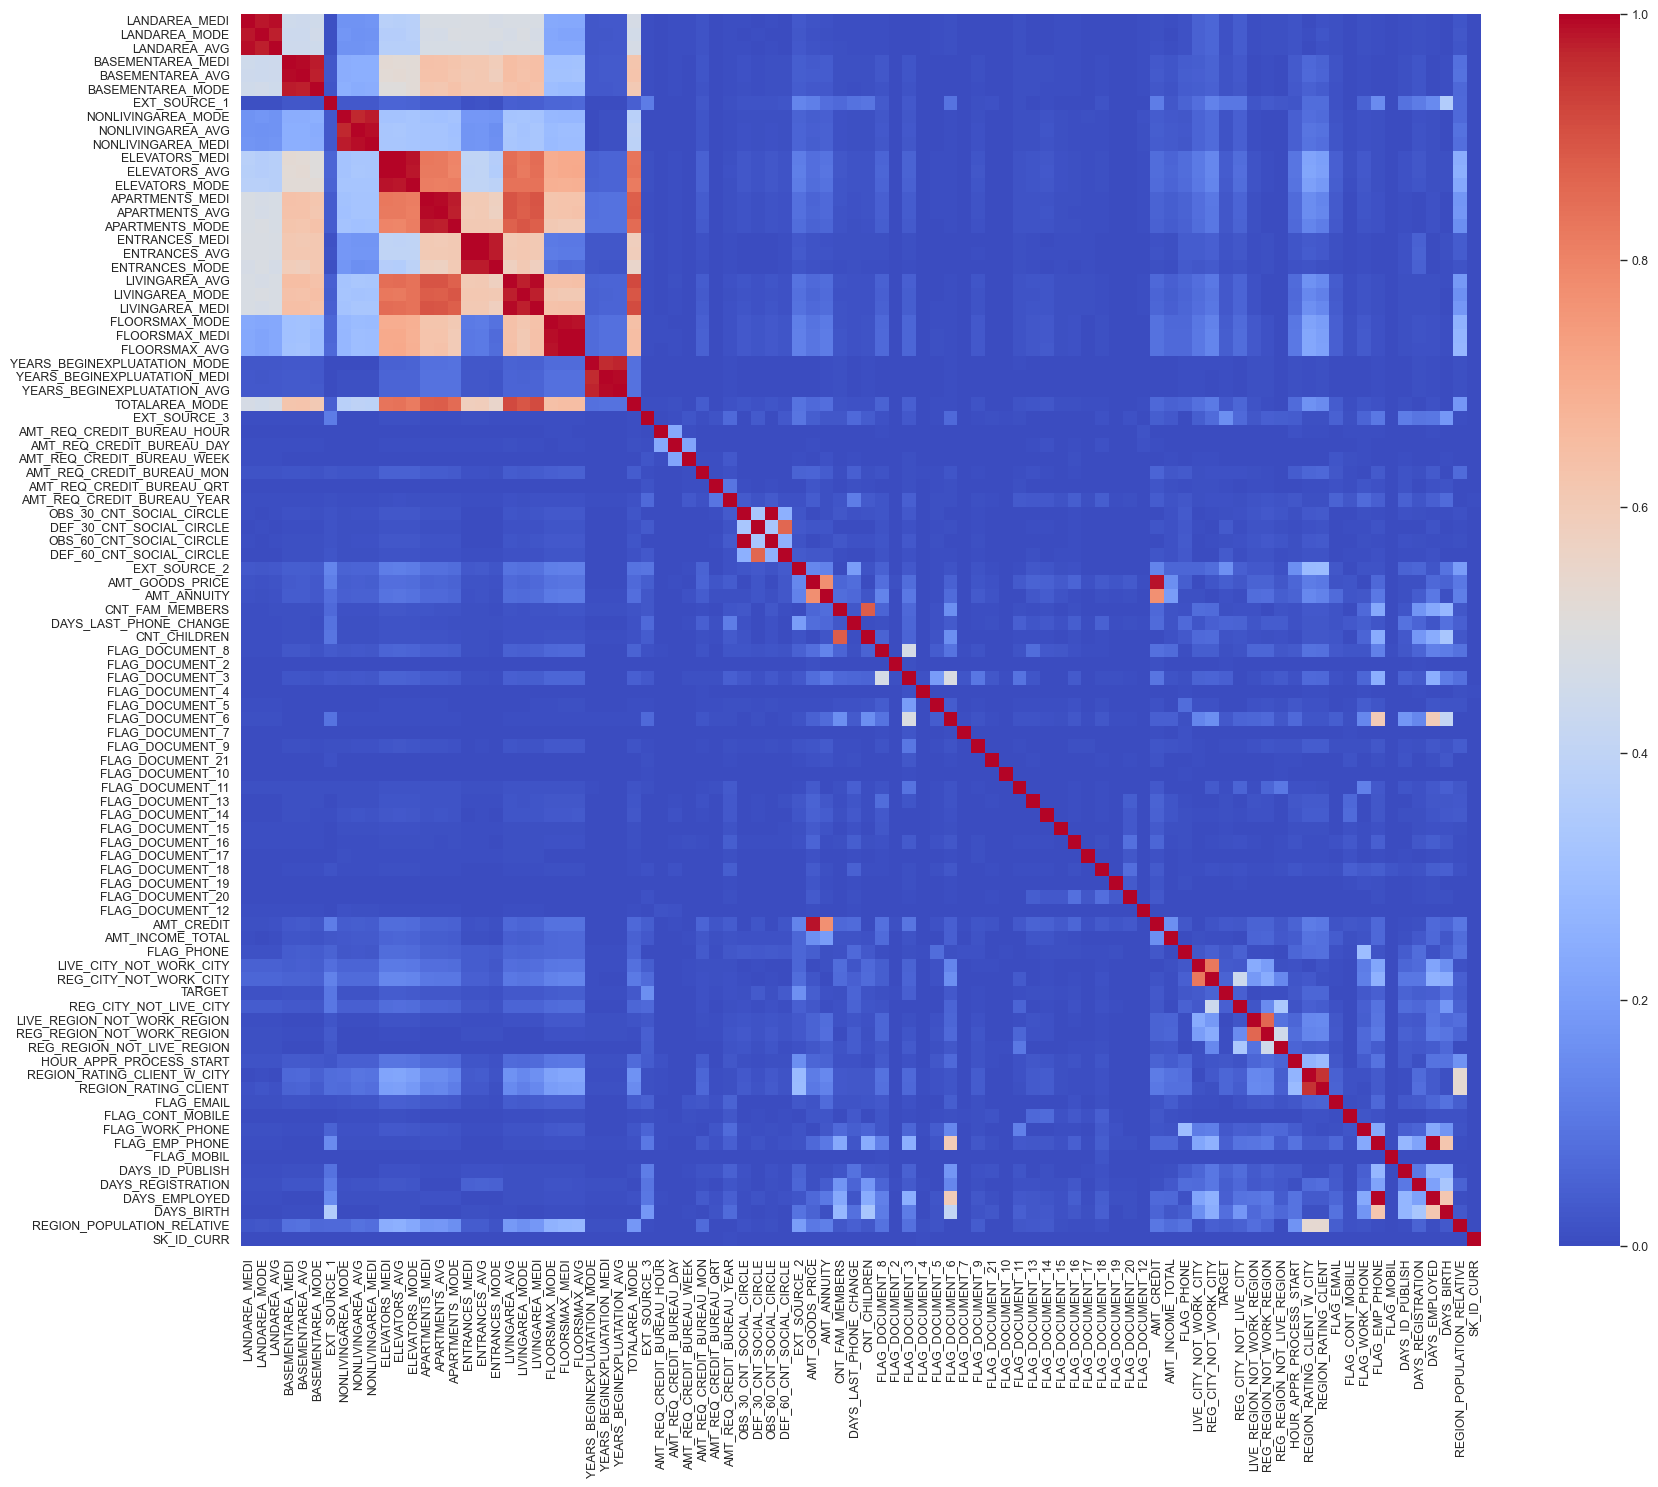

In [39]:
plt.figure(figsize=(20, 16))
sns.heatmap(corr_numerical, cmap='coolwarm')
plt.show()

In [40]:
corr_numerical.head()

,LANDAREA_MEDI,LANDAREA_MODE,LANDAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,BASEMENTAREA_MODE,EXT_SOURCE_1,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,ELEVATORS_MEDI,ELEVATORS_AVG,ELEVATORS_MODE,APARTMENTS_MEDI,APARTMENTS_AVG,APARTMENTS_MODE,ENTRANCES_MEDI,ENTRANCES_AVG,ENTRANCES_MODE,LIVINGAREA_AVG,LIVINGAREA_MODE,LIVINGAREA_MEDI,FLOORSMAX_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,TOTALAREA_MODE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,FLAG_DOCUMENT_8,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,AMT_CREDIT,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_EMAIL,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,SK_ID_CURR
LANDAREA_MEDI,1.000000,0.981392,0.991854,0.446524,0.444913,0.449387,0.011335,0.171256,0.171539,0.173402,0.375844,0.374909,0.376802,0.479457,0.477692,0.479543,0.480943,0.481869,0.469213,0.480221,0.480175,0.480290,0.230711,0.229969,0.230345,0.025408,0.028068,0.028710,0.471835,0.007306,0.000255,0.004595,0.005469,0.016439,0.003397,0.006692,0.004076,0.003824,0.003967,0.003104,0.028734,0.016464,0.013625,0.007697,0.005965,0.006738,0.006535,0.001043,0.003310,0.001873,0.005217,0.008161,0.001497,0.001976,0.002196,0.000918,0.008880,0.003598,0.001902,0.004903,0.006217,0.003168,0.000508,0.000034,0.002187,0.005153,0.011564,0.005178,0.015018,0.047958,0.059824,0.012269,0.035385,0.006267,0.010578,0.011048,0.018693,0.001188,0.013715,0.008804,0.002819,0.008489,0.007588,0.000885,0.007227,0.008154,0.007717,0.000892,0.021457,0.001217
LANDAREA_MODE,0.981392,1.000000,0.974467,0.440261,0.437505,0.456719,0.010583,0.177752,0.167125,0.170269,0.365718,0.364120,0.377620,0.470719,0.468466,0.486325,0.481214,0.481647,0.483313,0.470271,0.487144,0.471060,0.224818,0.218134,0.218431,0.025035,0.026857,0.027576,0.460482,0.006600,0.000105,0.004892,0.005640,0.015862,0.003497,0.006018,0.003549,0.004131,0.003434,0.003459,0.026980,0.014706,0.011293,0.007231,0.006094,0.006585,0.005027,0.001054,0.002208,0.001737,0.005099,0.007911,0.001396,0.003352,0.002330,0.000753,0.008650,0.002642,0.000824,0.004950,0.006497,0.003316,0.001220,0.000052,0.002634,0.005342,0.009999,0.003827,0.014024,0.047501,0.059474,0.011860,0.035254,0.006346,0.010360,0.011450,0.017362,0.007114,0.020824,0.008204,0.003589,0.008023,0.007114,0.000995,0.007567,0.008323,0.007241,0.000729,0.026459,0.001127
LANDAREA_AVG,0.991854,0.974467,1.000000,0.444133,0.442930,0.445816,0.011536,0.169970,0.171591,0.172284,0.374076,0.373875,0.374800,0.476512,0.475741,0.475958,0.477556,0.479254,0.465502,0.478511,0.476883,0.477783,0.230440,0.229584,0.230058,0.025330,0.028018,0.028659,0.470526,0.007297,0.000122,0.005231,0.006534,0.016647,0.003133,0.007191,0.004303,0.003733,0.004191,0.003095,0.029359,0.016949,0.014209,0.007900,0.005537,0.006913,0.006912,0.001019,0.003590,0.001786,0.005296,0.008272,0.001517,0.001812,0.002313,0.000933,0.008683,0.003854,0.002015,0.004831,0.006131,0.003114,0.000592,0.000040,0.001881,0.005116,0.012085,0.005443,0.014725,0.047989,0.059932,0.012047,0.035468,0.006296,0.010689,0.010904,0.018794,0.000194,0.012531,0.

In [41]:
col_drop = set()

for col1 in corr_numerical.columns:
    for col2 in corr_numerical.columns:
        if (corr_numerical.loc[col1, col2] >= 0.85) and (corr_numerical.loc[col1, col2] != 1.0):
            col_drop.add(col1)

col_drop = list(col_drop)

In [42]:
view_train.drop(col_drop, axis=1, inplace=True)

In [43]:
view_train.head()

,EXT_SOURCE_1,WALLSMATERIAL_MODE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,EXT_SOURCE_2,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_8,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_OWN_REALTY,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,FLAG_EMAIL,FLAG_CONT_MOBILE,ORGANIZATION_TYPE,FLAG_WORK_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR
0,0.083037,"Stone, brick",block of flats,No,Laborers,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,0.262949,24700.5,-1134.0,0,Cash loans,M,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,202500.0,1,0,0,1,0,0,10,WEDNESDAY,0,1,Business Entity Type 3,0,1,-2120,-3648.0,-9461,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,100002
1,0.311267,Block,block of flats,No,Core staff,0.510853,0.0,0.0,0.0,0.0,0.0,0.0,Family,0.622246,35698.5,-828.0,0,Cash loans,F,N,0,1,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0,0,0,0,270000.0,1,0,0,0,0,0,11,MONDAY,0,1,School,0,1,-291,-1186.0,-16765,0.003541,House / apartment,Married,Higher education,State servant,100003
2,0.502130,Panel,block of flats,No,Laborers,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.555912,6750.0,-815.0,0,Revolving loans,M,Y,0,0,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,67500.0,1,0,0,0,0,0,9,MONDAY,0,1,Government,1,1,-2531,-4260.0,-19046,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,100004
3,0.502130,Panel,block of flats,No,Laborers,0.510853,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,0.650442,29686.5,-617.0,0,Cash loans,F,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,135000.0,0,0,0,0,0,0,17,WEDNESDAY,0,1,Business Entity Type 3,0,1,-2437,-9833.0,-19005,0.008019,House / apartment,Civil marriage,Secondary / secondary special,Working,100006
4,0.502130,Panel,block of flats,No,Core staff,0.510853,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.322738,21865.5,-1106.0,1,Cash loans,M,N,0,0,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,121500.0,0,1,1,0,0,0,11,THURSDAY,0,1,Religion,0,1,-3458,-4311.0,-19932,0.028663,House / apartment,Single / not married,Secondary / secondary special,Working,100007


In [44]:
view_train.shape

(307511, 63)

In [45]:
drop_col_not_related = ['EXT_SOURCE_1', 'WALLSMATERIAL_MODE', 'SK_ID_CURR', 'EXT_SOURCE_2','EXT_SOURCE_3', 'DAYS_ID_PUBLISH']
view_train.drop(labels=drop_col_not_related, axis=1, inplace=True)

In [46]:
df_train = view_train.copy()

**Encoding**

In [47]:
non_numerical_column = [col for col in view_train.columns if view_train[col].dtype == 'O']
non_numerical_column

['HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE',
 'OCCUPATION_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE']

In [48]:
## Label Encoding
def label_encode(col):
    le = LabelEncoder()
    le.fit(view_train[col])
    view_train[col] = le.transform(view_train[col])

labels_encode = [col for col in non_numerical_column if len(view_train[col].unique()) <= 3]

for col in labels_encode:
    label_encode(col)

In [49]:
view_train[labels_encode]

,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,0,0,0,1,0,1
1,0,0,0,0,0,0
2,0,0,1,1,1,1
3,0,0,0,0,0,1
4,0,0,0,1,0,1
...,...,...,...,...,...,...
307506,0,0,0,1,0,0
307507,0,0,0,0,0,1
307508,0,0,0,0,0,1
307509,0,0,0,0,0,1


In [50]:
## One-Hot Encoding
onehot_encode = [col for col in non_numerical_column if len(view_train[col].unique()) > 3]
onehot_encode

['OCCUPATION_TYPE',
 'NAME_TYPE_SUITE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE']

In [51]:
onehot_col = pd.get_dummies(view_train[onehot_encode])
view_train.drop(onehot_encode, axis=1, inplace=True)
view_train = view_train.join(onehot_col)

In [52]:
view_train.head()

,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_8,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_OWN_REALTY,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,FLAG_EMAIL,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_MOBIL,DAYS_REGISTRATION,DAYS_BIRTH,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not

**Scaling**

In [53]:
scaling_column = ['AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 'DAYS_BIRTH']
scaling_column

['AMT_ANNUITY',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL',
 'DAYS_REGISTRATION',
 'DAYS_BIRTH']

In [54]:
def standarditation_col(col):
    ss = StandardScaler()
    ss.fit(view_train[[col]])
    view_train[col] = ss.transform(view_train[[col]])

for col in scaling_column:
    standarditation_col(col)

In [55]:
view_train.head()

,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_8,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_OWN_REALTY,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,FLAG_EMAIL,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_MOBIL,DAYS_REGISTRATION,DAYS_BIRTH,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not

In [56]:
X, y = view_train.drop(labels='TARGET', axis=1), view_train['TARGET']
X.drop(labels=['NAME_FAMILY_STATUS_Unknown', 'NAME_INCOME_TYPE_Maternity leave'], axis=1, inplace=True)

In [57]:
X

,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_8,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_OWN_REALTY,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,FLAG_EMAIL,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_MOBIL,DAYS_REGISTRATION,DAYS_BIRTH,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not marrie

In [58]:
y

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

## Models

In [59]:
def grid_function_model(estimator, param_grid, cv, X_train, y_train):
    gs = GridSearchCV(estimator=estimator,
                    param_grid=param_grid, 
                    cv=cv,
                    verbose=2)
    gs.fit(X_train, y_train)
    print(gs.best_estimator_)

*Logistic Regression*

In [60]:
lr = LogisticRegression()

lr_param = {
    "penalty" : ['l1', 'l2'],
    "C" : [0.8, 1.0],
    "solver" : ['liblinear'],
    "max_iter" : [50, 100]
}

grid_function_model(lr, lr_param, 2, X, y)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END ...C=0.8, max_iter=50, penalty=l1, solver=liblinear; total time=  26.5s
[CV] END ...C=0.8, max_iter=50, penalty=l1, solver=liblinear; total time=  26.7s
[CV] END ...C=0.8, max_iter=50, penalty=l2, solver=liblinear; total time=   6.4s
[CV] END ...C=0.8, max_iter=50, penalty=l2, solver=liblinear; total time=   9.4s
[CV] END ..C=0.8, max_iter=100, penalty=l1, solver=liblinear; total time= 1.1min
[CV] END ..C=0.8, max_iter=100, penalty=l1, solver=liblinear; total time=  50.2s
[CV] END ..C=0.8, max_iter=100, penalty=l2, solver=liblinear; total time=   6.5s
[CV] END ..C=0.8, max_iter=100, penalty=l2, solver=liblinear; total time=   9.4s
[CV] END ...C=1.0, max_iter=50, penalty=l1, solver=liblinear; total time=  33.4s
[CV] END ...C=1.0, max_iter=50, penalty=l1, solver=liblinear; total time=  35.7s
[CV] END ...C=1.0, max_iter=50, penalty=l2, solver=liblinear; total time=   6.8s
[CV] END ...C=1.0, max_iter=50, penalty=l2, solve

Parameter for Testing Logistic Regresion are `LogisticRegression(C=0.8, max_iter=50, penalty='l1', solver='liblinear')`

In [61]:
lr = LogisticRegression(C=0.8, max_iter=50, penalty='l1', solver='liblinear')
lr.fit(X, y)
lr.score(X, y)

0.9192744324593266

*Decision Tree*

In [62]:
dt = DecisionTreeClassifier()

dt_param = {
    "criterion" : ["gini", "entropy"],
    "max_leaf_nodes" : [2]
}

grid_function_model(dt, dt_param, 2, X, y)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END ...................criterion=gini, max_leaf_nodes=2; total time=   1.5s
[CV] END ...................criterion=gini, max_leaf_nodes=2; total time=   1.5s
[CV] END ................criterion=entropy, max_leaf_nodes=2; total time=   1.5s
[CV] END ................criterion=entropy, max_leaf_nodes=2; total time=   1.5s
DecisionTreeClassifier(max_leaf_nodes=2)


Parameter for Testing Decision Tree are `DecisionTreeClassifier(max_leaf_nodes=2)`

In [63]:
dt = DecisionTreeClassifier(max_leaf_nodes=2)
dt.fit(X, y)
dt.score(X, y)

0.9192711805431351

*Random Forest*

In [64]:
rf = RandomForestClassifier()

rf_param = {
    "n_estimators" : [50, 100],
    "criterion" : ["gini", "entropy"],
    "max_leaf_nodes" : [2],
    "bootstrap" : [False, True],
}

grid_function_model(rf, rf_param, 2, X, y)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END bootstrap=False, criterion=gini, max_leaf_nodes=2, n_estimators=50; total time=   5.7s
[CV] END bootstrap=False, criterion=gini, max_leaf_nodes=2, n_estimators=50; total time=   5.9s
[CV] END bootstrap=False, criterion=gini, max_leaf_nodes=2, n_estimators=100; total time=  11.1s
[CV] END bootstrap=False, criterion=gini, max_leaf_nodes=2, n_estimators=100; total time=  11.0s
[CV] END bootstrap=False, criterion=entropy, max_leaf_nodes=2, n_estimators=50; total time=   5.7s
[CV] END bootstrap=False, criterion=entropy, max_leaf_nodes=2, n_estimators=50; total time=   5.7s
[CV] END bootstrap=False, criterion=entropy, max_leaf_nodes=2, n_estimators=100; total time=  11.1s
[CV] END bootstrap=False, criterion=entropy, max_leaf_nodes=2, n_estimators=100; total time=  10.8s
[CV] END bootstrap=True, criterion=gini, max_leaf_nodes=2, n_estimators=50; total time=   5.2s
[CV] END bootstrap=True, criterion=gini, max_leaf_nodes=2, n_

Parameter for Testing Random Forest are `RandomForestClassifier(bootstrap=False, max_leaf_nodes=2, n_estimators=50)`

In [65]:
dt = RandomForestClassifier(bootstrap=False, max_leaf_nodes=2, n_estimators=50)
dt.fit(X, y)
dt.score(X, y)

0.9192711805431351

## Testing

In [66]:
df_test = pd.read_csv('3_home-credit-default-risk/application_test.csv')
print('This dataset has %d rows and %d columns.' % df_test.shape)

This dataset has 48744 rows and 121 columns.


In [67]:
df_train = df_train.drop(labels='TARGET', axis=1).columns.tolist()
df_test = df_test[df_train]

In [68]:
df_test.head()

,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_8,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_OWN_REALTY,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,FLAG_EMAIL,FLAG_CONT_MOBILE,ORGANIZATION_TYPE,FLAG_WORK_PHONE,FLAG_MOBIL,DAYS_REGISTRATION,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE
0,block of flats,No,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,20560.5,-1740.0,0,Cash loans,F,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,135000.0,0,0,0,0,0,18,TUESDAY,1,1,Kindergarten,0,1,-5170.0,-19241,0.018850,House / apartment,Married,Higher education,Working
1,NaN,NaN,Low-skill Laborers,0.0,0.0,0.0,0.0,0.0,3.0,Unaccompanied,17370.0,0.0,0,Cash loans,M,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,99000.0,0,0,0,0,0,9,FRIDAY,0,1,Self-employed,0,1,-9118.0,-18064,0.035792,House / apartment,Married,Secondary / secondary special,Working
2,NaN,NaN,Drivers,0.0,0.0,0.0,0.0,1.0,4.0,NaN,69777.0,-856.0,1,Cash loans,M,Y,0,0,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,202500.0,0,0,0,0,0,14,MONDAY,0,1,Transport: type 3,0,1,-2175.0,-20038,0.019101,House / apartment,Married,Higher education,Working
3,block of flats,No,Sales staff,0.0,0.0,0.0,0.0,0.0,3.0,Unaccompanied,49018.5,-1805.0,0,Cash loans,F,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,315000.0,1,0,0,0,0,11,WEDNESDAY,0,1,Business Entity Type 3,0,1,-2000.0,-13976,0.026392,House / apartment,Married,Secondary / secondary special,Working
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unaccompanied,32067.0,-821.0,0,Cash loans,M,Y,0,1,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0,0,0,0,180000.0,0,1,1,0,0,5,FRIDAY,0,1,Business Entity Type 3,1,1,-4000.0,-13040,0.010032,House / apartment,Married,Secondary / secondary special,Working


In [69]:
## -- Imputation --
def test_numerical_imputation(column):
    if column in median_column_numerical:
        df_test[column].fillna(value=df_test[column].median(), inplace=True)
    elif column in mean_column_numerical:
        df_test[column].fillna(value=df_test[column].mean(), inplace=True)

def test_non_numerical_imputation(column):
    df_test[column].fillna(value=df_test[column].mode()[0], inplace=True)

for col in df_test.columns:
    if df_test[col].dtype != 'O':
        test_numerical_imputation(col)
    else:
        test_non_numerical_imputation(col)

In [70]:
df_test.isna().sum().any()

False

In [71]:
## -- Encoding --
def test_label_encode(col):
    le = LabelEncoder()
    le.fit(df_test[col])
    df_test[col] = le.transform(df_test[col])

test_non_numerical_column = [col for col in df_test.columns if df_test[col].dtype == 'O']
test_labels_encode = [col for col in test_non_numerical_column if len(df_test[col].unique()) <= 3]

for col in test_labels_encode:
    test_label_encode(col)

## One-Hot Encoding
test_onehot_encode = [col for col in test_non_numerical_column if len(df_test[col].unique()) > 3]
test_onehot_encode

test_onehot_col = pd.get_dummies(df_test[test_onehot_encode])
df_test.drop(test_onehot_encode, axis=1, inplace=True)
df_test = df_test.join(test_onehot_col)

In [72]:
df_test.head()

,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_8,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_OWN_REALTY,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,FLAG_EMAIL,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_MOBIL,DAYS_REGISTRATION,DAYS_BIRTH,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not marrie

In [73]:
## -- Scaling -- 
def test_standarditation_col(col):
    ss = StandardScaler()
    ss.fit(df_test[[col]])
    df_test[col] = ss.transform(df_test[[col]])

for col in scaling_column:
    test_standarditation_col(col)

In [74]:
df_test.head()

,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_8,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_OWN_REALTY,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,FLAG_EMAIL,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_MOBIL,DAYS_REGISTRATION,DAYS_BIRTH,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not marrie

*Model for Testing*

*Logistic Regression*

In [75]:
X.shape, df_test.shape

((307511, 161), (48744, 161))

In [76]:
test_lr = LogisticRegression(C=0.8, max_iter=50, penalty='l1', solver='liblinear')
test_lr.fit(X, y)
result_lr_test = test_lr.predict(df_test)

print(f"Prediction using Logistic Regression:\n\n {result_lr_test}")

Prediction using Logistic Regression:

 [0 0 0 ... 0 0 0]


*Decision Tree*

In [77]:
test_dt = DecisionTreeClassifier(max_leaf_nodes=2)
test_dt.fit(X, y)
result_dt_test = test_dt.predict(df_test)

print(f"Prediction using Decision Tree:\n\n {result_dt_test}")

Prediction using Decision Tree:

 [0 0 0 ... 0 0 0]


*Random Forest*

In [78]:
test_rf = RandomForestClassifier(bootstrap=False, max_leaf_nodes=2, n_estimators=50)
test_rf.fit(X, y)
result_rf_test = test_rf.predict(df_test)

print(f"Prediction using Decision Tree:\n\n {result_rf_test}")

Prediction using Decision Tree:

 [0 0 0 ... 0 0 0]
